In [1]:
!pip install -q deepface

     |████████████████████████████████| 59 kB 3.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 8.6 MB/s 


In [2]:
from deepface import DeepFace
from google.colab import drive
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
drive.mount("/content/gdrive", force_remount=True)

imgs_path = "/content/gdrive/MyDrive/BDAMLproject/Face_Dataset/"

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
Mounted at /content/gdrive


## DeepFace.**find**: 
restituisce un dataframe *Pandas* dove la colonna **identity** contiene i path **assoluti** delle immagini contenute in *db_path* che contengono il volto contenuto in **img_path**.

In [11]:
imgs_same = DeepFace.find(img_path=os.path.join(imgs_path, os.listdir(imgs_path)[6]), db_path=imgs_path).identity.tolist()
imgs_same

There are  8  representations found in  representations_vgg_face.pkl
find function lasts  2.285252094268799  seconds


['/content/gdrive/MyDrive/Face_Dataset//mancini1.jpg',
 '/content/gdrive/MyDrive/Face_Dataset//mancini2.jpg']

##DeepFace.**verify**:
verifica se le immagini contenute nei due path contengono lo stesso volto

In [4]:
def verify(img1_path, img2_path):
  img1 = cv2.imread(img1_path)
  img2 = cv2.imread(img2_path)

  img = cv2.hconcat([cv2.resize(img1, (260,260)), cv2.resize(img2, (260,260))])
  cv2_imshow(img)

  result = DeepFace.verify(img1_path= img1_path, img2_path= img2_path, model_name = 'Facenet')
  print("results: ", result)

  verification = result['verified']

  if verification:
    print("they are same")
  else:
    print("they are not same")

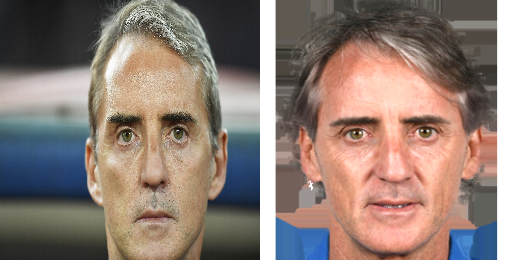

results:  {'verified': True, 'distance': 0.17690471011745768, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
they are same


In [9]:
verify(imgs_path+"mancini1.jpg", imgs_path+"mancini2.jpg")

##DeepFace.**detectFace**:
rileva il volto in immagine e ne restituisce il _ritaglio_.

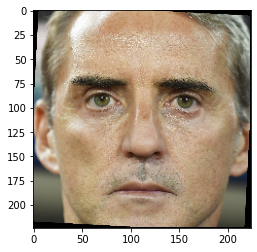

In [6]:
detected_face = DeepFace.detectFace(imgs_path+"mancini1.jpg")
plt.imshow(detected_face)

In [10]:
imgs_same[0]

'/content/gdrive/MyDrive/Face_Dataset//mancini1.jpg'

##DeepFace.**analyze**:
analizza il volto in figura. Le possibili _actions_ sono:
* **'emotion'**: valuta le emozioni espresse dal volto,
* **'age'**: l'eta',
* **'gender'**: il sesso,
* **'race'**: la provenienza/razza.

Di default vengono valutate *tutte le opzioni descritte sopra**.

In [7]:
result_emot = DeepFace.analyze(img_path=imgs_path+"mancini1.jpg",  actions=['emotion'], prog_bar=False)
result_emot

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 69.9MB/s]


{'dominant_emotion': 'fear',
 'emotion': {'angry': 19.329629838466644,
  'disgust': 0.0021445597667479888,
  'fear': 41.25615060329437,
  'happy': 0.00028864660635008477,
  'neutral': 2.185007929801941,
  'sad': 36.94964945316315,
  'surprise': 0.27713365852832794},
 'region': {'h': 1237, 'w': 1237, 'x': 784, 'y': 310}}